<div style='float: right'><img src='pic/museum.png'/></div>

## <div id='museum' />美術館

In [1]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from itertools import groupby
from pulp import LpProblem, lpSum, value
from ortoolpy import addbinvars
data = np.array([list(s) for s in """\
#.....#
..4...1
...2...
.#...1.
...#...
0...#..
#.....1""".splitlines()])

### 問題
* 黒マスに入っている数字は、それと隣接する縦横両隣の最大4つの白マスに入る○の数を表します
* 照明は，そのマスから上下左右に黒マスか外枠にぶつかるまでの範囲を照らします
* 斜めには照らすことはできません
* どの照明にも照らされていない白マスがあってはいけません
* 照明のあるマスは他の照明で照らされてはいけません

### 変数
* v:各マスに照明をおくかどうか (1)

### 制約
* 白マスの並びの中で照明は1つ以下 (2)
* 各マスは1つ以上の照明で照らされること (3)
* 数字の周りに同じ数の照明 (4)
* 数字に照明はおけない (5)

In [2]:
m = LpProblem()
u = np.array(addbinvars(data.shape[0]+2, data.shape[1]+2))
u[0] = u[-1] = u[:,0] = u[:,-1] = 0
v = u[1:-1,1:-1] # (1)
a = [[] for _ in range(v.shape[0] * v.shape[1])] # 見えるマス
b = np.arange(v.size).reshape(v.shape) # aのindex
c = data == '.' # 白マス
v[~c] = 0 # 黒マスは0 (5)
for v_, b_, c_ in [(v, b, c), (v.T, b.T, c.T)]:
    for vv, bb, cc in zip(v_, b_, c_):
        d = [0] + (cc[1:] != cc[:-1]).cumsum().tolist()
        g = groupby(zip(d,bb,cc,vv), lambda a: a[0])
        for e in [list(i[1]) for i in g]:
            f = lpSum(j[3] for j in e)
            if f:
                m += f <= 1 # (2)
                for j in e:
                    a[j[1]].append(f)
for aa in a:
    if aa:
        m += lpSum(aa) >= 1 # (3)
w = u[:-2,1:-1] + u[1:-1,2:] + u[2:,1:-1] + u[1:-1,:-2]
for h, e in zip(data.flat, w.flat):
    if h.isdigit():
        m += lpSum(e) == int(h) # (4)
m.solve()

1

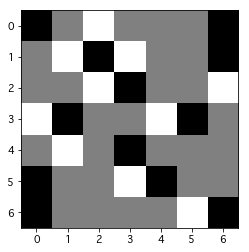

In [3]:
plt.imshow(c+np.vectorize(value)(v), cmap='gray', interpolation='none');